# **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:


df=pd.read_csv('first_project.csv')

In [3]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

# checking null values and df types

In [4]:
print(df.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

# Removing whitespaces from column names

In [6]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [7]:
df.columns

Index(['Booking_ID', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P-C', 'P-not-C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status'],
      dtype='object')

# Converting date into correct form

In [8]:
df['date_of_reservation'] = pd.to_datetime(df['date_of_reservation'], format='mixed', errors='coerce')

In [9]:
df.head()

Booking_ID  number_of_adults  number_of_children  number_of_weekend_nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number_of_week_nights  type_of_meal  car_parking_space    room_type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead_time market_segment_type  repeated  P-C  P-not-C  average_price  \
0        224             Offline         0    0        0          88.00   
1          5              Online         0    0        0         106.68   
2          1              Online         0    0        0          50.00   
3        211              Online         0    0        0         100.00   
4         48              Online         0    0        0          77.00   

   special_requests date_of_reservation booking_status  
0                 0          2015-10-02   Not_Canceled  
1                 1          2018-11-06   Not_Canceled  
2                 0          2018-02-28       Canceled  
3                 1          2017-05-20       Canceled  
4                 0          2018-04-11       Canceled

# Checking Outliers using IQR

In [10]:
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['lead_time'] >= Q1 - 1.5 * IQR) & (df['lead_time'] <= Q3 + 1.5 * IQR)]
outliers = df[(df['lead_time'] < Q1 - 1.5 * IQR) | (df['lead_time'] > Q3 + 1.5 * IQR)]
print(outliers[['lead_time']].head())


Empty DataFrame
Columns: [lead_time]
Index: []


<Axes: ylabel='lead_time'>

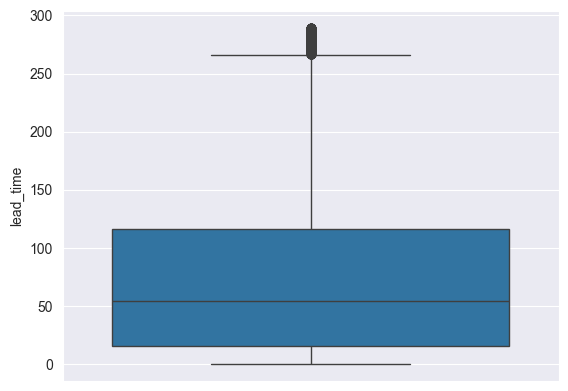

In [11]:
sns.boxplot(data=df, y='lead_time')


In [12]:
Q1 = df['average_price'].quantile(0.25)
Q3 = df['average_price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['average_price'] >= Q1 - 1.5 * IQR) & (df['average_price'] <= Q3 + 1.5 * IQR)]
outliers = df[(df['average_price'] < Q1 - 1.5 * IQR) | (df['average_price'] > Q3 + 1.5 * IQR)]
print(outliers[['average_price']].head())

Empty DataFrame
Columns: [average_price]
Index: []


<Axes: ylabel='average_price'>

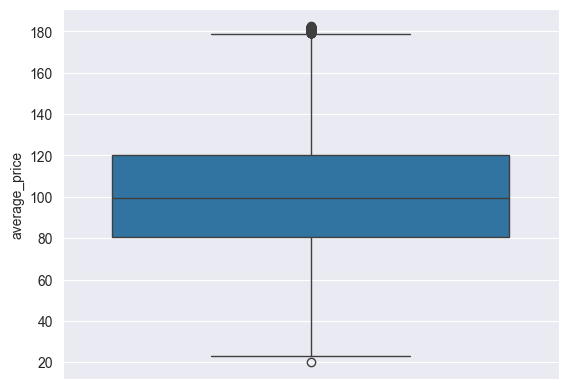

In [13]:
sns.boxplot(data=df, y='average_price')


In [14]:
df.head()

Booking_ID  number_of_adults  number_of_children  number_of_weekend_nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number_of_week_nights  type_of_meal  car_parking_space    room_type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead_time market_segment_type  repeated  P-C  P-not-C  average_price  \
0        224             Offline         0    0        0          88.00   
1          5              Online         0    0        0         106.68   
2          1              Online         0    0        0          50.00   
3        211              Online         0    0        0         100.00   
4         48              Online         0    0        0          77.00   

   special_requests date_of_reservation booking_status  
0                 0          2015-10-02   Not_Canceled  
1                 1          2018-11-06   Not_Canceled  
2                 0          2018-02-28       Canceled  
3                 1          2017-05-20       Canceled  
4                 0          2018-04-11       Canceled

# Feature Engineering


In [15]:
#choose the columns that help for our model
df = df.drop(['Booking_ID'], axis=1) # not important
# Extract from date of reservation information like year , day ,month
df['year'] = df['date_of_reservation'].dt.year
df['month'] = df['date_of_reservation'].dt.month
df['day'] = df['date_of_reservation'].dt.day



In [16]:
df['total_guests'] = df['number_of_adults'] + df['number_of_children'] # new column to get total guests per reservation
df.drop('number_of_adults', axis=1, inplace=True)
df.drop('number_of_children', axis=1, inplace=True)


In [17]:
df.columns

Index(['number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P-C', 'P-not-C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status', 'year', 'month', 'day',
       'total_guests'],
      dtype='object')

# Encoding the categorical df into numerical

In [18]:
df['booking_status']=df['booking_status'].replace("Not_Canceled",1)
df['booking_status']=df['booking_status'].replace("Canceled",0)

C:\Users\johns\AppData\Local\Temp\ipykernel_23384\1856832332.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['booking_status']=df['booking_status'].replace("Canceled",0)


In [19]:
df['booking_status'].head()

0    1
1    1
2    0
3    0
4    0
Name: booking_status, dtype: int64

In [20]:
print(df.columns.tolist())


['number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal', 'car_parking_space', 'room_type', 'lead_time', 'market_segment_type', 'repeated', 'P-C', 'P-not-C', 'average_price', 'special_requests', 'date_of_reservation', 'booking_status', 'year', 'month', 'day', 'total_guests']


In [21]:
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=["type_of_meal", "room_type", "market_segment_type"])
df_encoded.drop('date_of_reservation', axis=1, inplace=True)



In [22]:
df_encoded.head()


number_of_weekend_nights  number_of_week_nights  car_parking_space  \
0                         2                      5                  0   
1                         1                      3                  0   
2                         1                      3                  0   
3                         0                      2                  0   
4                         1                      2                  0   

   lead_time  repeated  P-C  P-not-C  average_price  special_requests  \
0        224         0    0        0          88.00                 0   
1          5         0    0        0         106.68                 1   
2          1         0    0        0          50.00                 0   
3        211         0    0        0         100.00                 1   
4         48         0    0        0          77.00                 0   

   booking_status  ...  room_type_Room_Type 3  room_type_Room_Type 4  \
0               1  ...                  False                  False   
1               1  ...                  False                  False   
2               0  ...                  False                  False   
3               0  ...                  False                  False   
4               0  ...                  False                  False   

   room_type_Room_Type 5  room_type_Room_Type 6  room_type_Room_Type 7  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   market_segment_type_Aviation  market_segment_type_Complementary  \
0                         False                              False   
1                         False                              False   
2                         False                              False   
3                         False                              False   
4                         False                              False   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                          False                         True   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

   market_segment_type_Online  
0                       False  
1                        True  
2                        True  
3                        True  
4                        True  

[5 rows x 29 columns]

In [23]:
df_encoded.corr(numeric_only=True)['booking_status'].sort_values(ascending=False)


booking_status                       1.000000
special_requests                     0.245222
market_segment_type_Corporate        0.111092
repeated                             0.100869
market_segment_type_Offline          0.086437
car_parking_space                    0.080543
P-not-C                              0.053657
room_type_Room_Type 1                0.036126
type_of_meal_Meal Plan 1             0.036026
month                                0.031938
P-C                                  0.030466
market_segment_type_Complementary    0.015231
room_type_Room_Type 5                0.008950
room_type_Room_Type 7                0.007250
market_segment_type_Aviation         0.002198
room_type_Room_Type 3               -0.002309
day                                 -0.005759
room_type_Room_Type 2               -0.006651
type_of_meal_Not Selected           -0.017186
room_type_Room_Type 6               -0.023365
room_type_Room_Type 4               -0.031818
type_of_meal_Meal Plan 2          

In [24]:
df_encoded.columns

Index(['number_of_weekend_nights', 'number_of_week_nights',
       'car_parking_space', 'lead_time', 'repeated', 'P-C', 'P-not-C',
       'average_price', 'special_requests', 'booking_status', 'year', 'month',
       'day', 'total_guests', 'type_of_meal_Meal Plan 1',
       'type_of_meal_Meal Plan 2', 'type_of_meal_Not Selected',
       'room_type_Room_Type 1', 'room_type_Room_Type 2',
       'room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

In [25]:
df_encoded.head()

number_of_weekend_nights  number_of_week_nights  car_parking_space  \
0                         2                      5                  0   
1                         1                      3                  0   
2                         1                      3                  0   
3                         0                      2                  0   
4                         1                      2                  0   

   lead_time  repeated  P-C  P-not-C  average_price  special_requests  \
0        224         0    0        0          88.00                 0   
1          5         0    0        0         106.68                 1   
2          1         0    0        0          50.00                 0   
3        211         0    0        0         100.00                 1   
4         48         0    0        0          77.00                 0   

   booking_status  ...  room_type_Room_Type 3  room_type_Room_Type 4  \
0               1  ...                  False                  False   
1               1  ...                  False                  False   
2               0  ...                  False                  False   
3               0  ...                  False                  False   
4               0  ...                  False                  False   

   room_type_Room_Type 5  room_type_Room_Type 6  room_type_Room_Type 7  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   market_segment_type_Aviation  market_segment_type_Complementary  \
0                         False                              False   
1                         False                              False   
2                         False                              False   
3                         False                              False   
4                         False                              False   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                          False                         True   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

   market_segment_type_Online  
0                       False  
1                        True  
2                        True  
3                        True  
4                        True  

[5 rows x 29 columns]

# modifying null values and scaling


In [26]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = [
    'number_of_weekend_nights', 'number_of_week_nights',
    'car_parking_space', 'lead_time', 'repeated', 'P-C', 'P-not-C',
    'average_price', 'special_requests', 'year', 'month', 'day',
    'total_guests'
]

categorical_features = [
    'type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
    'type_of_meal_Not Selected', 'room_type_Room_Type 1',
    'room_type_Room_Type 2', 'room_type_Room_Type 3',
    'room_type_Room_Type 4', 'room_type_Room_Type 5',
    'room_type_Room_Type 6', 'room_type_Room_Type 7',
    'market_segment_type_Aviation', 'market_segment_type_Complementary',
    'market_segment_type_Corporate', 'market_segment_type_Offline',
    'market_segment_type_Online'
]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


# spliting data for training


In [27]:
from sklearn.model_selection import train_test_split

# Convert all boolean columns to int
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

X = df_encoded.drop(['booking_status'], axis=1)
y = df_encoded['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
print(X_train.isna().sum())
print(X_test.isna().sum())


number_of_weekend_nights              0
number_of_week_nights                 0
car_parking_space                     0
lead_time                             0
repeated                              0
P-C                                   0
P-not-C                               0
average_price                         0
special_requests                      0
year                                 26
month                                26
day                                  26
total_guests                          0
type_of_meal_Meal Plan 1              0
type_of_meal_Meal Plan 2              0
type_of_meal_Not Selected             0
room_type_Room_Type 1                 0
room_type_Room_Type 2                 0
room_type_Room_Type 3                 0
room_type_Room_Type 4                 0
room_type_Room_Type 5                 0
room_type_Room_Type 6                 0
room_type_Room_Type 7                 0
market_segment_type_Aviation          0
market_segment_type_Complementary     0


# Models


In [29]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve
import numpy as np

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}

for name, clf in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    pipeline.fit(X_train, y_train)
    y_probs = pipeline.predict_proba(X_test)[:, 1]

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]

    y_pred = (y_probs >= best_threshold).astype(int)

    print(f"=== {name} ===")
    print(f"Best threshold: {best_threshold:.4f}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print()

=== Random Forest ===
Best threshold: 0.4308
Accuracy: 0.9013345329134803
F1-score: 0.9303703703703704

=== Logistic Regression ===
Best threshold: 0.4112
Accuracy: 0.7944219523166891
F1-score: 0.8622802611752888

=== XGBoost ===
Best threshold: 0.4146
Accuracy: 0.8918878392562604
F1-score: 0.9238567958601753



In [30]:
import joblib

feature_names = [
    # numeric_features
    'number_of_weekend_nights',
    'number_of_week_nights',
    'car_parking_space',
    'lead_time',
    'repeated',
    'P-C',
    'P-not-C',
    'average_price',
    'special_requests',
    'year',
    'month',
    'day',
    'total_guests',

    # categorical_features
    'type_of_meal_Meal Plan 1',
    'type_of_meal_Meal Plan 2',
    'type_of_meal_Not Selected',
    'room_type_Room_Type 1',
    'room_type_Room_Type 2',
    'room_type_Room_Type 3',
    'room_type_Room_Type 4',
    'room_type_Room_Type 5',
    'room_type_Room_Type 6',
    'room_type_Room_Type 7',
    'market_segment_type_Aviation',
    'market_segment_type_Complementary',
    'market_segment_type_Corporate',
    'market_segment_type_Offline',
    'market_segment_type_Online'
]

Randomforest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

Randomforest.fit(X_train, y_train)


joblib.dump((Randomforest,feature_names), "hotel_booking_random_forest_model_and_features.joblib")
print("Model saved as hotel_booking_random_forest_model.joblib2")


Model saved as hotel_booking_random_forest_model.joblib2
